In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hashlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
# general load of the dataset 

fname = []
for j in range(3):
    fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
    if not os.path.isfile(fname[j]):
        try:
            r = requests.get(url[j])
        except requests.ConnectionError:
            print("!!! Failed to download data !!!")
        else:
            if r.status_code != requests.codes.ok:
                print("!!! Failed to download data !!!")
            else:
                with open(fname[j], "wb") as fid:
                    fid.write(r.content)

## from the tutorial, from the data retrieval and loading cell
url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
        elif hashlib.md5(r.content).hexdigest() != expected_md5:
            print("!!! Data download appears corrupted !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

## from the tutorial, from the data retrieval and loading cell 
def load_steinmetz_data(data_fname=fname):
    with np.load(data_fname) as dobj:
        data = dict(**dobj)
    return data

data = load_steinmetz_data() 
for key, val in data.items():
    print(key, val.shape)

spikes (276, 691)
choices (276,)


# W1 D4 T2 (Sam)

sample_dataset_download


things I edited/doubts start with ## KB 

In [80]:
## Data retrieval
import os, requests

fname = []
for j in range(3):
    fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
    if not os.path.isfile(fname[j]):
        try:
            r = requests.get(url[j])
        except requests.ConnectionError:
            print("!!! Failed to download data !!!")
        else:
            if r.status_code != requests.codes.ok:
                print("!!! Failed to download data !!!")
            else:
                with open(fname[j], "wb") as fid:
                    fid.write(r.content)

## this script is based on the W1D4 tutorial 2 logistic regression decoder
simple_decoder

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hashlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [82]:
#Helper functions taken from the tutorial

def plot_weights(models, sharey=True):
    """Draw a stem plot of weights for each model in models dict."""
    n = len(models)
    f = plt.figure(figsize=(10, 2.5 * n))
    axs = f.subplots(n, sharex=True, sharey=sharey)
    axs = np.atleast_1d(axs)
    
    for ax, (title, model) in zip(axs, models.items()):
        ax.margins(x=.02)
        stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
        stem[0].set_marker(".")
        stem[0].set_color(".2")
        stem[1].set_linewidths(.5)
        stem[1].set_color(".2")
        stem[2].set_visible(False)
        ax.axhline(0, color="C3", lw=3)
        ax.set(ylabel="Weight", title=title)
    ax.set(xlabel="Neuron (a.k.a. feature)")
    f.tight_layout()


def plot_function(f, name, var, points=(-10, 10)):
    """Evaluate f() on linear space between points and plot.

    Args:
      f (callable): function that maps scalar -> scalar
      name (string): Function name for axis labels
      var (string): Variable name for axis labels.
      points (tuple): Args for np.linspace to create eval grid.
    """
    x = np.linspace(*points)
    ax = plt.figure().subplots()
    ax.plot(x, f(x))
    ax.set(
      xlabel=f'${var}$',
      ylabel=f'${name}({var})$'
    )

def plot_model_selection(C_values, accuracies):
    """Plot the accuracy curve over log-spaced C values."""
    ax = plt.figure().subplots()
    ax.set_xscale("log")
    ax.plot(C_values, accuracies, marker="o")
    best_C = C_values[np.argmax(accuracies)]
    ax.set(
      xticks=C_values,
      xlabel="$C$",
      ylabel="Cross-validated accuracy",
      title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
    )

def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
    """Plot the accuracy curve over log-spaced C values."""
    ax = plt.figure().subplots()
    ax.set_xscale("log")
    ax.plot(C_values, non_zero_l1, marker="o")
    ax.set(
    xticks=C_values,
    xlabel="$C$",
    ylabel="Number of non-zero coefficients",
    )
    ax.axhline(n_voxels, color=".1", linestyle=":")
    ax.annotate("Total\n# Neurons", (C_values[0], n_voxels * .98), va="top")

def sigmoid(z):
    return 1 / (1+np.exp(-z))

download the steinmetz dataset used in the tutorial

In [84]:
## from the tutorial, from the data retrieval and loading cell
url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
        elif hashlib.md5(r.content).hexdigest() != expected_md5:
            print("!!! Data download appears corrupted !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

In [85]:
## from the tutorial, from the data retrieval and loading cell 
def load_steinmetz_data(data_fname=fname):
    with np.load(data_fname) as dobj:
        data = dict(**dobj)
    return data

# Load data

In [86]:
#this is sample data provided in tutorial 
## KB data with array of spikes (normalized spike rates!, n_trials, n_neurons) and choices (0s and 1s, n_trials)
data = load_steinmetz_data() 
for key, val in data.items():
    print(key, val.shape)

spikes (276, 691)
choices (276,)


In [108]:
len((data['spikes'][0]))

691

 * an X matrix with shape (n_samples, n_features) - something about the experiment
 * a y vector with length n_samples. - neural data

In [110]:
#DATA #here we need to load our own data!!
y = data["choices"] #these are the binary choices the animal made on each trial (trialnr)
X = data["spikes"] #these are the mean spike rates for each neuron (trialnr x neurons)

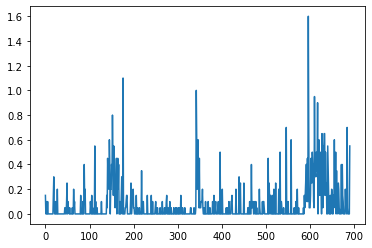

In [128]:
plt.figure
plt.plot(X[0,:]) ## KB spikes of the first trial

fit logistic regression models

In [129]:
# First define the model
log_reg = LogisticRegression(penalty='none',solver='newton-cg')

#Then fit it to data
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

There's two steps here:

- We *initialized* the model with a hyperparameter, telling it what penalty to use (we'll focus on this in the second part of the notebook)
- We *fit* the model by passing it the `X` and `y` objects.

In [130]:
#get accuracy of the model on thectraining set (should be high!)

# Fitting the model performs maximum likelihood optimization, learning a set of *feature weights*. 
# We can use those learned weights to *classify* new data, or predict the labels for each sample:
y_pred = log_reg.predict(X) ## classifying the training data

In [131]:
len(y_pred)

276

In [136]:
def compute_accuracy(X, y, model):
  """Compute accuracy of classifier predictions.
  
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    model (sklearn estimator): Classifier with trained weights.

  Returns:
    accuracy (float): Proportion of correct predictions.  
  """

  y_pred = model.predict(X)
  accuracy = np.sum(y_pred == y)/len(y) #or np.mean() in the last part

  return accuracy

# Uncomment and run to test your function:
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 100.00%


In [137]:
## Sam (same as prev step)
#train_accuracy = np.mean(y_pred == y)
#print(f"Accuracy on the training data: {train_accuracy:.2%}") 

Cross-validatinng using scikit-learn helper functions

L2 Rwgularization below

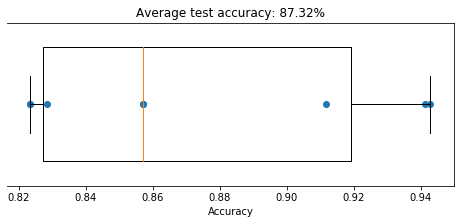

In [154]:
#get accuracy of the model on a k-fold cross validated set

k=8 #choose k-fold
reg = 'l2' #choose regularization. 'none', 'l1', or 'l2'
lam = 1 #choose lambda for regularizer

#fit model
#log_reg = LogisticRegression(penalty='none').fit(X, y)
log_reg = LogisticRegression(penalty=reg, C=1/lam, solver='lbfgs').fit(X, y)

#get cross-validated accuracies
#accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8) ##KB the way it was used in the tutorial 
accuracies = cross_val_score(log_reg, X, y, cv=k)

#plot the resulting accuracies
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones_like(accuracies))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

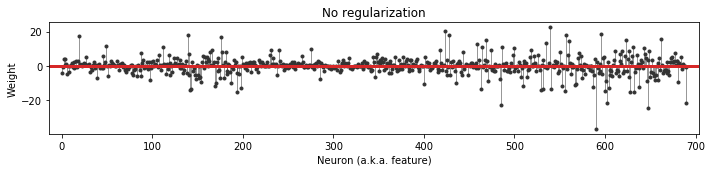

In [156]:
## KB 
log_reg = LogisticRegression(penalty="none").fit(X, y)
plot_weights({"No regularization": log_reg})

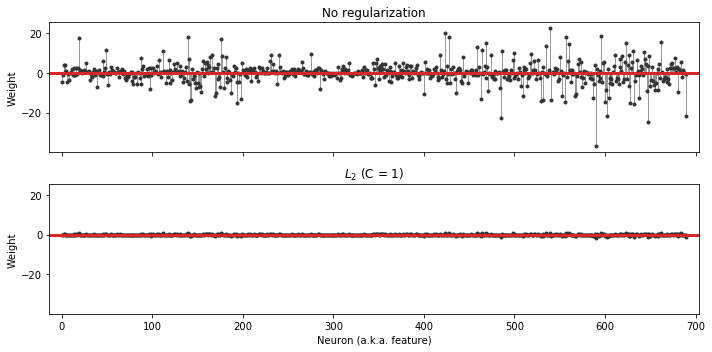

In [157]:
##KB 
log_reg_l2 = LogisticRegression(penalty="l2", C=1).fit(X, y)

# now show the two models
models = {
  "No regularization": log_reg,
  "$L_2$ (C = 1)": log_reg_l2,
}
plot_weights(models)

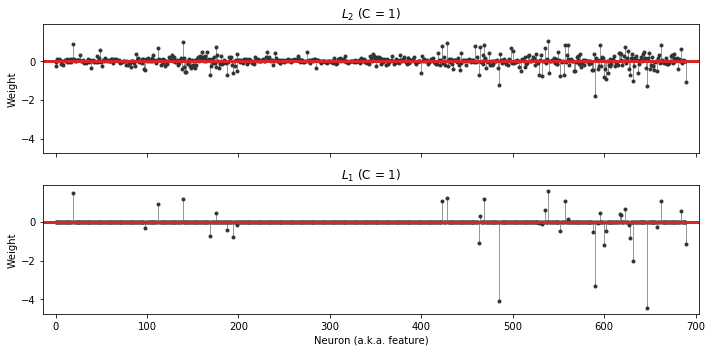

In [158]:
## KB just to test L1

log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000) #too low can we stuck in local min
log_reg_l1.fit(X, y)
models = {
  "$L_2$ (C = 1)": log_reg_l2,
  "$L_1$ (C = 1)": log_reg_l1,
}
plot_weights(models)

#S almost uses L2 
#once fitted we can take out the 0s, it can be faster

In [162]:
def model_selection(X, y, C_values, CV_values):
    """Compute CV accuracy for each C value.

    Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    C_values (1D array): Array of hyperparameter values

    Returns:
    accuracies (1D array): CV accuracy with each value of C

    """
    accuracies_all = []

    for CV in CV_values:

        accuracies = []

        for C in C_values:

            # Initialize and fit the model
            model = LogisticRegression(penalty='l2',C=C, solver='lbfgs',max_iter=5000)
            model.fit(X,y)

            # Get the accuracy for each test split
            accs = cross_val_score(model,X,y,cv=int(CV))

            # Store the average test accuracy for this value of C
            accuracies.append(np.mean(accs))

        accuracies_all.append(accuracies)

    return accuracies_all



# Use log-spaced values for C and CV

C_values = np.logspace(-4, 4, 9)

#CV_values = np.linspace(2,20,10)
CV_values = np.logspace(1,7,7,base=2)
#CV_values = np.logspace(np.arange(2,50,2)

accuracies_all = model_selection(X, y, C_values, CV_values)

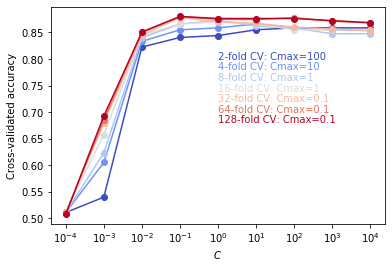

In [163]:
ax = plt.figure().subplots()
ax.set_xscale("log")
cmap = plt.cm.get_cmap('coolwarm')
for i,accuracies in enumerate(accuracies_all):
    c = cmap(i/(len(accuracies_all)-1))
    ax.plot(C_values, accuracies, marker="o",color=c)
    best_C = C_values[np.argmax(accuracies)]
    plt.text(1,0.8-0.02*i,f"{CV_values[i]:1g}-fold CV: Cmax={best_C:1g}",color=c)
ax.set(
  xticks=C_values,
  xlabel="$C$",
  ylabel="Cross-validated accuracy",
)
plt.show()

# From nma_Class_Copy1 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as st
import platform
import os, csv
from os import path
from numba import jit
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.interpolate import interp1d
from sklearn.decomposition import TruncatedSVD
import scipy.stats as st
import platform

from nma_class_Copy1 import loader
from nma_class_Copy1 import eda

main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# initialize loader object
loader = loader(main_folder)

"""
Class for all the functions from Samuel, Kcenia and Max NMA Projekt


"""

class compute():
    """[class to compute stuff]

    Returns:
        [type]: [description]
    """    
    def __init__(self, session):
        self.session = session
        self.trials_df = session['trials_df']
        self.spikes_df = session['spikes_df']
        self.clusters_df = session['clusters_df']



In [62]:
class eda():
    """[library to perfrom exploratory data analyis on spikes]
    """    
    def __init__(self, data, session, main_folder, params):
        """[initialize session analyse object]

        Args:
            data ([toubple]): [(spikes_df, clusters_df, trials_df)]
            session ([string]): [session folder]
            main_folder ([type]): [description]
            params ([dict]): [dictionary with all necessary infromation
                                params['sampling_rate] ([int]): [sampling rate for spikes]
                            ]
        """        
        self.folder = main_folder
        self.spikes_df, self.clusters_df, self.trials_df = data
        self.session = session
        # load all parameters
        if 'sampling_rate' in params:
            self.sampling_rate = params['sampling_rate']
        else:
            self.sampling_rate = 20000


 # Helper Functions EDA =================================================================================================
    # find spikes between
    def get_spikes_for_trial(self, array, start, stop):
        '''
        params: array = numpy array (N,1) with values to check against
                start, stop = value to find all values in array between
        return: valus in array between start and stop
        '''
        ar = array[np.logical_and(array >= start, array <= stop)]
        if ar.size > 0:
            ar = ar[:] - ar[0]
        return ar






 # Plotting ==========================================================================================================
    # event plot for all spikes
    def plt_spike_train(self, cluster, spikes, trials_df, params=dict()):
        """[generate spike event plot for given spikes and given trial start and end]

        Args:
            cluster ([int]): [selected neuron]
            spikes ([numpy array]): [spikes for neuron to plot]
            trials_df ([pandas data frame]): [format: index=trial, col1=start of trial, col2=stop of trial]
            params ([dict]): [optional, default = empty, params['brain_region' = brain region of cluster] ]

        Returns:
            [type]: [description]
        """        
        # initialize plot
        fig, ax = plt.subplots()
        # initialize list with spikes per trial
        spikes_trials = []
        # get spikes for each trial
        for row in trials_df.index:
            start = trials_df.iloc[row, 0]
            stop = trials_df.iloc[row, 1]
            spk = self.get_spikes_for_trial(spikes, start, stop)
            #if len(spk)>0:
            spikes_trials.append(spk)
        # plot spikes
        ax.eventplot(spikes_trials, color=".2")
        # set title and axis labels
        if 'brain_region' in params:
            ax.set_title(f"Spikes for Cluster {cluster}, Brain Region: {params['brain_region']}")
        ax.set_title(f"Spikes for Cluster {cluster}")
        ax.set_xlabel(f"Sampling Points [{self.sampling_rate/1000}kHz]")
        ax.set_ylabel('Trial')
        index = trials_df.index[0::10]
        ax.set_yticks(index - index[0])
        ax.set_yticklabels(index)
        return ax, fig

        # Tweak spacing to prevent clipping of ylabel
        fig.tight_layout()
        plt.show

    # plot spike trains araound event with histogram for spike time and trial
    def plt_spike_train_hist_bar(self, cluster, event, window, trials_df, spikes_ar, fig=None, ax=[None, None, None], title=None):
        """[summary]

        Args:
            cluster ([int]): [neuron to plot]
            event ([string]): [event name]
            window ([int]): [window to plot spikes: event_time-window < spikes < event_time+window]
            trials_df ([dataframe]): [event times to plot for, must be only column in dataframe]
            spikes_ar ([numpy array]): [array with all spikes of neuron to plot]
            fig ([plt.subfig figure], optional): [description]. Defaults to None.
            ax (plt.subfig axis, optional): [description]. Defaults to [None, None, None].
            title ([string], optional): [description]. Defaults to None.

        Returns:
            fig [plt.subfig figure]: [description]
            (ax1, ax2, ax3) [plt.subfig axis]: [description]

        """        
        # create fig, gird and axis ===============
        if any(i==None for i in ax)or fig==None:
            #create figure with shape
            fig = plt.figure(figsize=(6,5))
            # create gridspecs
            gs = fig.add_gridspec(2, 3,  hspace=0, wspace=0)
            # create axis for hist spike train
            ax1 = fig.add_subplot(gs[0, :2])
            ax2 = fig.add_subplot(gs[1, :2])
            ax2.get_shared_x_axes().join(ax1, ax2)
            # create axis for trial hist
            ax3 = fig.add_subplot(gs[0, 2])
            ax3.get_shared_y_axes().join(ax1, ax3)
        else:
            ax1, ax2, ax3 = ax
        
        # loop that iterats trough all trials
        y = 0
        # array to store spike count for each trial
        hist_tr = np.empty([0,])    
        # list to store spikes for time bin in for eventplot and histogram
        #spk_ar = np.empty((len(trials_df),1), dtype=object)
        spk_ls = []


        ##spike train plot ========================
        # main loop over each trial
        for row in trials_df.index:
            # derive spike times in range delta around event time for trial
            ar = spikes_ar[( ( spikes_ar >= (trials_df[row] - window) ) & ( spikes_ar <= (trials_df[row] + window) ) )]
            ar = ar - trials_df[row]
            # ad spike count to hist_tr for row
            hist_tr = np.append(hist_tr, ar.size)
            # add to histogram array
            spk_ls.append(ar.flatten().tolist())

        # plot eventplot
        ax1.eventplot(spk_ls, color=".2")
        ## draw red line at event
        ax1.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
        # spike train y lable
        ax1.set_ylabel('Trial')
        ## set y axis 1. plot
        # set ticks
        step = trials_df.index.size/5
        start = 0
        stop = trials_df.index.size+step/2
        ax1.set_yticks(np.arange(start, stop, step).astype(int))
        # set tick labels
        stop = trials_df.index.size
        label = trials_df.index.values[np.arange(start, stop, step).astype(int)]
        label = np.append(label, trials_df.index.values[-1])
        ax1.set_yticklabels(label)
        # set y limits 1. plot
        ax1.set_ylim([0, stop])
        ##labels
        # trun x labels inside
        ax1.tick_params(axis="x",direction="in")
        # turn of labels on shared x axis only ticks
        plt.setp(ax1.get_xticklabels(), visible=False)
        # write event
        ax1.set_title(event, color='red', fontsize=8)

        ## plot histogram spikes ===========================
        num_bins = 60
        # flatten list of sikes for histogram
        flattened = [val for sublist in spk_ls for val in sublist]
        # draw histogram
        ax2.hist(flattened, bins=num_bins, color="tab:blue")
        # draw red line at event
        ax2.axvline(x=0,ymin=0,ymax=1,c="red",linewidth=0.5)
        # naming y axis
        ax2.set_ylabel('Spike Count')
        # set x ticks
        step = window/4
        start = -window
        stop = window+(step/2)
        x_ticks = np.arange(start, stop, step)
        ax2.set_xticks(x_ticks)
        # set x ticks labels to seconds
        # set x limits
        ax2.set_xlim([-window, window])
        if window > 1000:
            window = window/1000
        step = window/4
        start = -window
        stop = window+(step/2)
        x_labels = np.arange(start, stop, step)
        ax2.set_xticklabels(x_labels)
        # set ticks top and bottom
        ax2.tick_params(axis='x', bottom=True, top=True)


        ## plot histogram trials =================================
        pos = np.arange(0, len(hist_tr))
        # invert axis
        ax3.invert_xaxis()
        # remove ticks
        ax3.set_yticks([])

        ## plot histogram
        ax3 = plt.barh(pos, hist_tr.reshape(hist_tr.size), height=1.0, color='lightgray')

        # name main title
        #ax.set_title('Spikes for Cluster 1')
        if title != None:
            event = title
        fig.suptitle(f"Spikes for Cluster: {cluster} at Event: {event}")
        plt.xlabel('Position [ms]')
        
        #return fig, (ax1, ax2, ax3)
        return aspk_lsr

In [49]:
# 1) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 

data = [spikes_df, clusters_df, trials_df]
params = dict()
params['sampling_rate'] = 20000

session_eda = eda(data, all_session_names[0], all_session_folders[0], params)

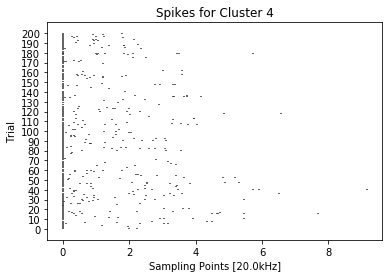

'\nThis means that Cluster 4 had the following spike times(xx) per trial(yy)\n'

In [50]:
# 1) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
cluster = 4
spikes = clusters_df.loc[cluster, 'spikes']
trials_select_df = trials_df.loc[trials_df['included']==True, ['start time','end time']]
fig, ax = session_eda.plt_spike_train(cluster, spikes, trials_select_df)
plt.show()

'''
This means that Cluster 4 had the following spike times(xx) per trial(yy)
'''

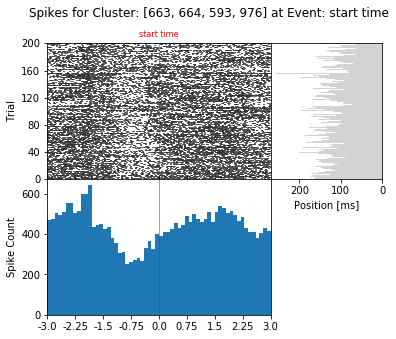

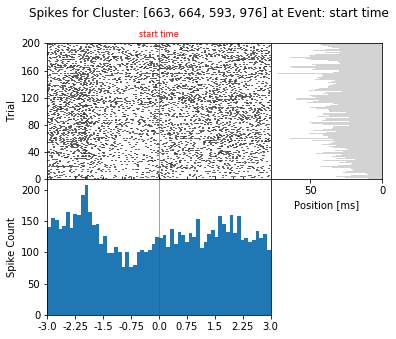

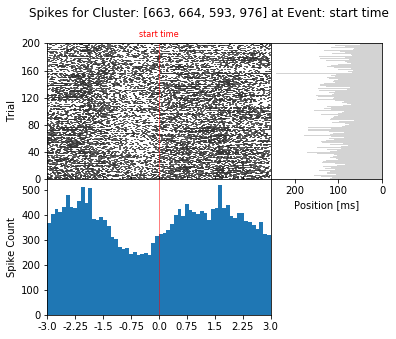

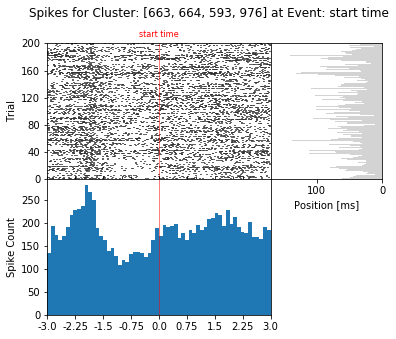

In [51]:
# 2) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
title = None
#cluster = [220, 730, 867, 873, 884]
cluster = [663, 664, 593, 976] #visual primary cortx
#cluster = [264, 271, 273] #MOs

event = 'start time' #select the event to be time = 0 and plot the spikes around it
window = 3 #from -1 to 1 seconds if window = 1

for i in range(len(cluster)): 
    trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True, 'start time']
    spikes = clusters_df.loc[cluster[i], 'spikes']
    fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df, spikes)
plt.show()

# W1 D5 T4 

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import qgrid

#from nma_class import loader
from nma_class_Copy1 import loader
from nma_class_Copy1 import eda


%matplotlib inline

In [65]:
# for the first session: 

# link to parent folder with all datasets
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

from nma_class_Copy1 import loader
#to load older sessions 
loader = loader(main_folder)
all_session_folders, all_session_names = loader.get_available_session()
# load default session 
# put here any integer instead of 0 or directly the folder of the session

session_folder = all_session_folders[0]
session_name =  all_session_names[0]
session = loader.load_session(session_folder, fast=True)

spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']







#separate data for the correct trials
trials_select_df = trials_df.loc[trials_df['included']==True]

correct_df = trials_select_df.loc[(trials_select_df['feedback type']==1)]
diff_contrasts_df = correct_df.loc[(correct_df['stim contrast left']!=(correct_df['stim contrast right']))]
no_contrasts_df = correct_df.loc[(correct_df['stim contrast left']==0) & (correct_df['stim contrast right']==0)]

clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True)

clusters_df

,label,spikes,total spikes,recording area
cluster,,,,
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS
5,mua,"[0.0155, 0.8953666666666666, 1.3817, 1.8120333...",2733,ACA
8,mua,"[0.17423333333333332, 0.19976666666666668, 0.2...",5905,LS
12,mua,"[2.3132, 3.0502333333333334, 3.6675, 4.928, 5....",6704,ACA
18,mua,"[3.3243666666666667, 7.3177666666666665, 8.189...",5589,MOs
...,...,...,...,...
994,mua,"[2.7875193566472314, 2.809886123350189, 3.0496...",10533,DG
996,mua,"[2.543018263105959, 5.156129950356261, 5.19923...",1639,root
998,mua,"[2.4551178699678085, 3.6627566045154234, 5.027...",1523,SUB


In [66]:
(clusters_df['spikes'][19])

array([   6.80883333,   17.3553    ,   18.89993333,   20.897     ,
         27.77033333,   33.68706667,   37.01853333,   45.40676667,
         49.6012    ,   50.49506667,   53.91083333,   59.94136667,
         62.3238    ,   69.75136667,   81.10503333,   82.6268    ,
         87.42433333,   89.573     ,   90.36166667,   95.97893333,
         96.15953333,   97.96863333,  102.29003333,  109.43846667,
        122.11666667,  132.81523333,  135.38206667,  144.85973333,
        145.7681    ,  170.82123333,  175.0914    ,  181.27556667,
        181.62656667,  186.99833333,  189.1988    ,  189.46896667,
        190.1149    ,  195.0351    ,  198.94703333,  210.47896667,
        220.39826667,  221.29496667,  226.54703333,  232.19756667,
        234.4458    ,  234.61443333,  234.62133333,  239.61336667,
        240.1612    ,  240.38086667,  240.91776667,  241.44556667,
        242.1205    ,  246.98563333,  253.6652    ,  257.0913    ,
        257.78853333,  258.35436667,  261.13546667,  269.35393

In [94]:
trials_df['start time'] [0:100]

0      62.900284
1      68.420838
2      74.602902
3      79.003653
4      85.501795
         ...    
95    561.476013
96    565.393091
97    569.591057
98    574.744323
99    578.225465
Name: start time, Length: 100, dtype: float64

In [68]:
#From 2nd plots code Max
data = [spikes_df, clusters_df, trials_df]
params = dict()
params['sampling_rate'] = 20000

session_eda = eda(data, all_session_names[0], all_session_folders[0], params)

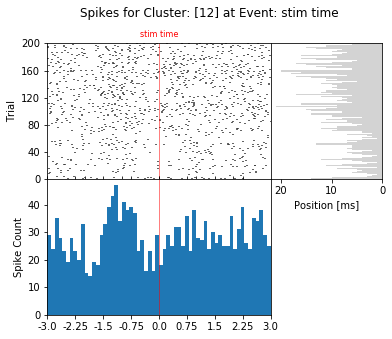

In [69]:
title = None
cluster = [12]
event = 'stim time' #select the event to be time = 0 and plot the spikes around it
window = 3 #from -1 to 1 seconds if window = 1
trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True]
for i in range(len(cluster)): 
    spikes = clusters_df.loc[cluster[i], 'spikes']
    fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df['start time'], spikes)
plt.show()

In [70]:
trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True]
trials_select_df['stim time'][0:50]

0      65.269408
1      71.202703
2      76.052380
3      81.235263
4      86.800952
5      90.650613
6      95.984298
7      99.550755
8     105.566451
9     111.066939
10    115.982617
11    123.716340
12    129.732436
13    133.282493
14    136.948951
15    143.097849
16    152.697202
17    161.330540
18    167.830244
19    171.412701
20    175.479965
21    184.562910
22    188.144967
23    192.662239
24    199.028741
25    203.378410
26    207.177271
27    211.577341
28    215.710207
29    222.427114
30    231.426857
31    236.193333
32    243.708653
33    247.675117
34    253.508810
35    257.424472
36    269.591466
37    274.157539
38    278.790813
39    283.323685
40    294.822668
41    298.906333
42    303.588808
43    307.889277
44    313.654569
45    318.171041
46    322.554310
47    330.920444
48    335.137711
49    339.469780
Name: stim time, dtype: float64

In [71]:
print(spikes[0:50])

[ 2.3132      3.05023333  3.6675      4.928       5.1281      5.55226667
  5.92873333  7.33833333  7.73246667  8.02933333  8.0955     10.816
 12.0976     12.3482     12.56306667 12.97953333 13.19466667 13.57023333
 13.76856667 22.7023     23.09633333 23.41036667 23.58643333 23.8307
 23.99806667 24.41883333 24.8081     24.92223333 25.34966667 26.3879
 29.14003333 31.40273333 31.56153333 31.75843333 33.26526667 35.2263
 35.59513333 35.9806     36.09083333 36.57813333 37.821      37.98653333
 38.7137     39.8072     40.30513333 42.52003333 44.87563333 45.24083333
 45.6765     45.91373333]


In [72]:
# Imports
import numpy as np
import matplotlib.pyplot as plt 

In [73]:
#@title Data retrieval and loading
import os
import requests
import hashlib

url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    elif hashlib.md5(r.content).hexdigest() != expected_md5:
      print("!!! Data download appears corrupted !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

def load_steinmetz_data(data_fname=fname):

  with np.load(data_fname) as dobj:
    data = dict(**dobj)

  return data

In [74]:
data = load_steinmetz_data()
data

{'spikes': array([[0.15, 0.  , 0.1 , ..., 0.  , 0.  , 0.55],
        [0.2 , 0.05, 0.25, ..., 0.  , 0.  , 0.7 ],
        [0.1 , 0.  , 0.6 , ..., 0.  , 0.  , 0.55],
        ...,
        [0.  , 0.  , 0.15, ..., 0.  , 0.  , 0.5 ],
        [0.  , 0.  , 0.3 , ..., 0.  , 0.  , 0.4 ],
        [0.  , 0.05, 0.05, ..., 0.  , 0.  , 0.4 ]], dtype=float32),
 'choices': array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 0., 0.,

In [75]:
#@title Helper functions


def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

In [76]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
X = mnist.data
labels = [int(k) for k in mnist.target]
labels = np.array(labels)

In [81]:
(labels)

array([5, 0, 4, ..., 4, 5, 6])

In [82]:
data['spikes']

array([[0.15, 0.  , 0.1 , ..., 0.  , 0.  , 0.55],
       [0.2 , 0.05, 0.25, ..., 0.  , 0.  , 0.7 ],
       [0.1 , 0.  , 0.6 , ..., 0.  , 0.  , 0.55],
       ...,
       [0.  , 0.  , 0.15, ..., 0.  , 0.  , 0.5 ],
       [0.  , 0.  , 0.3 , ..., 0.  , 0.  , 0.4 ],
       [0.  , 0.05, 0.05, ..., 0.  , 0.  , 0.4 ]], dtype=float32)

In [83]:
X = data['spikes']

In [92]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2) # Initializes PCA
pca_model.fit(X) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Exercise 1: Visualization of MNIST in 2D using PCA

Fill in the code below to perform PCA and visualize the top two  components. For better visualization, take only the first 2,000 samples of the data (this will also make t-SNE much faster in the following section of the tutorial so don't skip this step!)

**Suggestions:**
- Truncate the data matrix at 2,000 samples. You will also need to truncate the array of labels.
- Perform PCA on the truncated data.
- Use the function `visualize_components` to plot the labelled data.

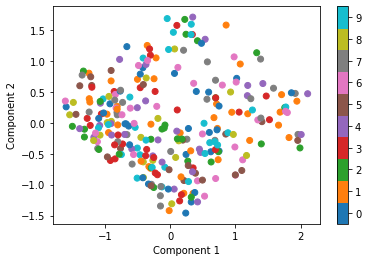

In [93]:
# Take only the first 2000 samples with the corresponding labels
X, labels = X[:276,:], labels[:276] #labels is the vector
# Perform PCA 
scores = pca_model.transform(X)

# Plot the data and reconstruction
visualize_components(scores[:,0],scores[:,1],labels)